In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/drive/MyDrive/Defense/CNN_Defense.zip" -d "/content/dataset2/"

Archive:  /content/drive/MyDrive/Defense/CNN_Defense.zip
  inflating: /content/dataset2/Defense1/.DS_Store  
   creating: /content/dataset2/Defense1/test/
   creating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/.DS_Store  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/.hklhklkl.jpg  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/20190501_173940.jpg  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/20190501_173948.jpg  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/20190501_174006.jpg  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/20190501_174014.jpg  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/20190501_174020.jpg  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/20190501_174026.jpg  
  inflating: /content/dataset2/Defense1/test/Asota_Moth_Caterpillar/2019

In [ ]:
# Set the dimensions for the input images
image_height, image_width = 224, 224
num_channels = 3

# Define the paths to your train and test data directories
train_dir = '/content/dataset2/Defense1/train'
test_dir = '/content/dataset2/Defense1/test'

# Create ImageDataGenerator with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,   # Rescale pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create ImageDataGenerator without data augmentation for testing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and preprocess train data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=16,
    class_mode='categorical'
)

# Load and preprocess test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=16,
    class_mode='categorical'
)

# Get the number of classes
num_classes = len(train_data.class_indices)

Found 3598 images belonging to 9 classes.
Found 900 images belonging to 9 classes.


In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    return model

# Create the CNN model
model = create_cnn_model(input_shape=(image_height, image_width, num_channels), num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

Epoch 1/50
225/225 [==============================] - 62s 224ms/step - loss: 1.6745 - accuracy: 0.3999 - val_loss: 1.2322 - val_accuracy: 0.5656
Epoch 2/50
225/225 [==============================] - 54s 239ms/step - loss: 1.2718 - accuracy: 0.5445 - val_loss: 1.1545 - val_accuracy: 0.5789
Epoch 3/50
225/225 [==============================] - 51s 225ms/step - loss: 1.1648 - accuracy: 0.5909 - val_loss: 1.0042 - val_accuracy: 0.6456
Epoch 4/50
225/225 [==============================] - 51s 227ms/step - loss: 1.0207 - accuracy: 0.6412 - val_loss: 1.0166 - val_accuracy: 0.6589
Epoch 5/50
225/225 [==============================] - 48s 215ms/step - loss: 0.9188 - accuracy: 0.6762 - val_loss: 0.8589 - val_accuracy: 0.6978
Epoch 6/50
225/225 [==============================] - 49s 220ms/step - loss: 0.8335 - accuracy: 0.7048 - val_loss: 1.0300 - val_accuracy: 0.6433
Epoch 7/50
225/225 [==============================] - 48s 214ms/step - loss: 0.7360 - accuracy: 0.7418 - val_loss: 0.9043 - val_ac

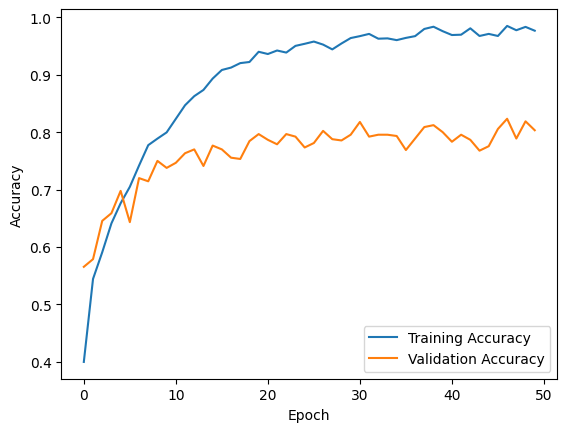

In [ ]:
# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=50,
    validation_data=test_data,
    validation_steps=len(test_data)
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


57/57 [==============================] - 6s 100ms/step - loss: 1.3551 - accuracy: 0.8033
Test Loss: 1.3551
Test Accuracy: 0.8033
57/57 [==============================] - 3s 47ms/step


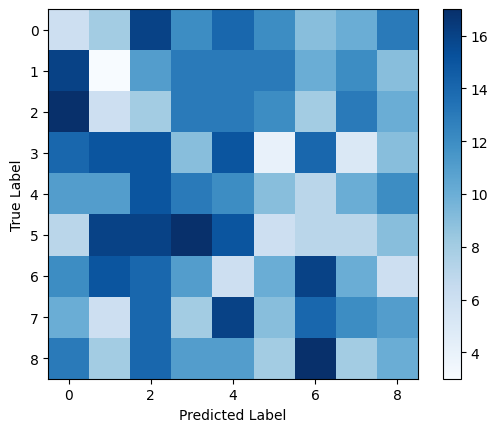

Classification Report:
                                    precision    recall  f1-score   support

            Asota_Moth_Caterpillar       0.06      0.06      0.06       100
                      Caterpillars       0.03      0.03      0.03       100
                           Cutworm       0.07      0.08      0.07       100
Henosepilachna_vigintioctopunctata       0.08      0.09      0.09       100
                      Heteropterus       0.10      0.12      0.11       100
                        Lawn_Grubs       0.07      0.06      0.07       100
                         Mealy_Bug       0.16      0.16      0.16       100
                          Rice_Bug       0.14      0.12      0.13       100
           long_horned_grasshopper       0.11      0.10      0.11       100

                          accuracy                           0.09       900
                         macro avg       0.09      0.09      0.09       900
                      weighted avg       0.09      0.09      0.

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, steps=len(test_data))

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predict the test set labels
y_pred = model.predict(test_data, steps=len(test_data))
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true test set labels
y_true_classes = test_data.classes

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
class_names = list(train_data.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


1/1 [==============================] - 0s 203ms/step


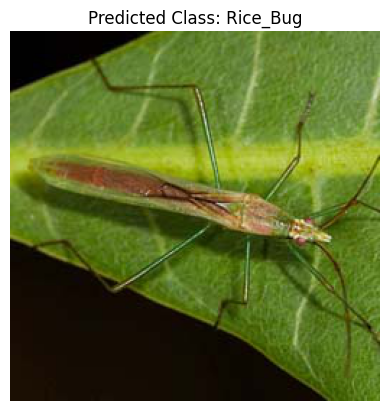

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the trained model (if you haven't trained it in the same session)
# model = tf.keras.models.load_model('path/to/saved_model')

# Function to preprocess a single image for prediction
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Example usage
test_image_path = '/content/dataset2/Defense1/test/Rice_Bug/05e-stenocoris-sp-brazil.jpg'  # Replace with the path to your test image
input_shape = (224, 224)

# Preprocess the test image
test_image = preprocess_image(test_image_path, target_size=input_shape)

# Make prediction
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_data.class_indices.keys())

# Display the result
plt.imshow(load_img(test_image_path))
plt.title(f'Predicted Class: {class_labels[predicted_class]}')
plt.axis('off')
plt.show()